<a href="https://colab.research.google.com/github/pastrop/chat/blob/master/Market_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Notebook is inspired by the Kaggle Jane Street competion. The target variable (presented as a product of transaction response and transaction weight) is Poisson distributed.  Therefore the idea is to consider the target as some sort of a integer "score" and apply GLM model using the target log as an intermediary variable  

In [1]:
%%capture
!pip install kaggle

In [2]:
# file upload while using Google Colab
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [ ]:
 ! kaggle datasets list

In [ ]:
#!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json
#!kaggle config set -n path -v{/content}
!chmod 600 /root/.kaggle/kaggle.json
#!kaggle competitions download -c jane-street-market-prediction
!kaggle competitions download -c jane-street-market-prediction -f example_test.csv

In [7]:
!unzip example_test.csv.zip

Archive:  example_test.csv.zip
  inflating: example_test.csv        


In [8]:
import pandas

In [9]:
df = pandas.read_csv('example_test.csv')

In [46]:
df.tail(4)

,weight,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,...,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,feature_100,feature_101,feature_102,feature_103,feature_104,feature_105,feature_106,feature_107,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,feature_116,feature_117,feature_118,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,date,ts_id
15201,1.360193,1,-1.811504,-2.306446,3.917303,2.495504,1.390398,0.762097,2.701736,1.994287,1.246563,-0.081644,0.910395,0.513021,1.082228,0.064262,2.654127,1.641796,2.953507,2.605335,3.306616,2.385943,2.339956,0.887497,2.847250,2.181867,3.564012,2.514675,-1.462478,-1.542918,-2.734258,-2.614825,-1.161378,-1.522605,-2.074266,-1.569261,-3.877179,-2.627221,5.234008,3.998935,...,0.059481,0.123030,-0.549534,1.222079,0.711601,2.408301,0.875383,0.766502,1.748452,1.731263,0.590631,2.172258,0.491447,0.692573,2.366708,1.588642,0.691344,1.133971,0.402477,0.410161,1.007794,1.992913,0.255665,1.243711,0.399559,0.582253,0.997620,1.096480,1.452227,-1.938755,3.743729,0.754253,1.499055,-1.817823,2.469732,-1.051702,2.867944,-0.301983,2,15201
15202,1.991327,-1,0.766996,0.397504,3.884914,3.558184,3.226635,2.914808,-0.206605,-0.295693,2.247463,1.420535,0.733564,0.925141,3.555319,2.892152,0.877779,0.819234,-0.271972,-0.323216,-0.857819,-0.960311,-0.762781,-0.369449,-0.849923,-0.943265,-1.064225,-1.079241,1.468363,2.004095,2.644734,3.046008,2.722473,3.972460,4.707609,4.733023,3.524039,3.199631,-0.948648,-0.891579,...,1.870334,4.078434,5.410662,1.644804,0.969590,-0.052016,2.220295,2.633331,-0.337409,2.063076,0.648598,-0.305265,1.344597,2.362943,-0.828432,1.585756,1.617314,4.832769,1.913416,3.449848,4.182430,2.641958,0.766632,4.788559,2.085793,4.152676,3.762411,1.259828,0.101602,-0.369151,1.151413,1.301698,-0.061946,-1.062610,0.575003,0.261161,1.205862,1.145315,2,15202
15211,3.221672,-1,11.429610,7.072927,-6.714210,-4.166545,-3.980052,-2.372645,-2.357589,-1.825029,4.072077,1.324209,-0.445596,-0.897031,-5.400546,-3.391299,2.854429,1.540260,-3.944550,-3.437201,-3.000324,-2.580841,-5.251410,-2.438545,-5.619529,-4.957580,-3.519088,-2.937679,1.200318,0.940963,4.344550,3.068108,2.235244,2.035404,3.871686,2.447606,5.227643,3.000763,-8.137298,-5.824181,...,1.623800,1.957578,0.091765,1.243468,1.909509,-1.338859,2.936132,4.266431,-1.194013,1.161711,2.297318,-0.940190,2.457278,4.918027,-1.781693,1.216467,2.204434,-0.803528,1.913039,3.008125,-1.182054,1.533191,1.730827,-0.957560,2.678498,4.586784,-1.352232,0.947064,1.872610,-1.588960,3.297573,0.167565,1.284142,-2.451120,2.631636,-1.133878,3.054784,-0.360152,2,15211
15212,4.578606,-1,-3.172026,-3.093182,3.883736,3.517033,2.823677,2.507810,-1.197526,-1.247768,-6.127479,-4.303411,-2.475352,-3.612133,-3.678822,-2.982725,-3.915232,-4.662219,-1.813249,-2.291814,-3.708817,-4.266882,-4.210997,-2.636818,-4.077858,-4.913306,-4.226706,-4.629261,0.104152,0.109132,0.523864,0.462033,0.204139,0.206238,0.366620,0.278123,0.654458,0.429039,-2.382493,-2.415797,...,2.432800,-0.377959,-0.599185,6.794004,1.340996,2.753407,2.769814,2.746680,2.680174,1.906953,5.647487,9.906858,8.442025,11.238251,12.687909,6.644100,1.270626,1.458896,1.397995,1.410858,1.893584,2.447663,4.000851,7.311323,6.735744,7.894014,7.949674,5.792524,-1.148432,0.517090,2.848555,12.955562,-0.303950,3.858204,1.399925,7.881655,2.763662,11.726936,2,15212


In [10]:
df = df[df['weight'] != 0].dropna()

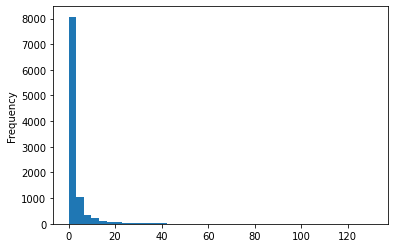

In [40]:
ax = df['weight'].plot.hist(bins=40, alpha=1)

In [47]:
col = ['weight', 'ts_id']
df_for_plot = df[col]

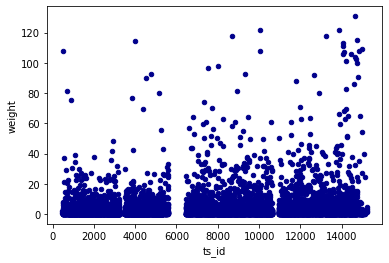

In [53]:
df_for_plot.plot.scatter(x='ts_id',y='weight',c='DarkBlue')

In [31]:
ranges = []
for i in range(110):
  ran = i
  ind = i
  tmp = df[(df['weight'] > i) & (df['weight'] < ind+1)].shape[0]
  ranges.append((tmp,ran))

In [26]:
df.shape

(10203, 133)

In [32]:
print(ranges)

[(5200, 0), (1788, 1), (886, 2), (553, 3), (350, 4), (236, 5), (185, 6), (130, 7), (87, 8), (89, 9), (67, 10), (56, 11), (61, 12), (44, 13), (43, 14), (36, 15), (26, 16), (26, 17), (18, 18), (19, 19), (11, 20), (22, 21), (16, 22), (10, 23), (14, 24), (17, 25), (14, 26), (7, 27), (11, 28), (11, 29), (11, 30), (4, 31), (14, 32), (7, 33), (8, 34), (5, 35), (3, 36), (7, 37), (2, 38), (8, 39), (4, 40), (4, 41), (4, 42), (4, 43), (1, 44), (5, 45), (3, 46), (0, 47), (1, 48), (2, 49), (3, 50), (4, 51), (1, 52), (2, 53), (2, 54), (2, 55), (1, 56), (0, 57), (1, 58), (2, 59), (2, 60), (2, 61), (2, 62), (3, 63), (3, 64), (0, 65), (1, 66), (1, 67), (0, 68), (2, 69), (1, 70), (1, 71), (0, 72), (0, 73), (1, 74), (1, 75), (1, 76), (0, 77), (0, 78), (1, 79), (1, 80), (2, 81), (1, 82), (0, 83), (0, 84), (0, 85), (1, 86), (0, 87), (1, 88), (0, 89), (2, 90), (0, 91), (3, 92), (0, 93), (0, 94), (0, 95), (1, 96), (1, 97), (0, 98), (1, 99), (0, 100), (1, 101), (1, 102), (1, 103), (0, 104), (2, 105), (0, 106)

In [ ]:
ranges = []
for _, value in df['weight'].items():
  tmp = int(round(value))
  if tmp == 0:
    tmp = 1
  ranges.append(tmp)
len(ranges)  

In [ ]:
df['counts'] = ranges

In [ ]:
# Poisson regression code
import statsmodels.api as sm
exog, endog = sm.add_constant(x), y
mod = sm.GLM(endog, exog,family=sm.families.Poisson(link=sm.families.links.log))
res = mod.fit()